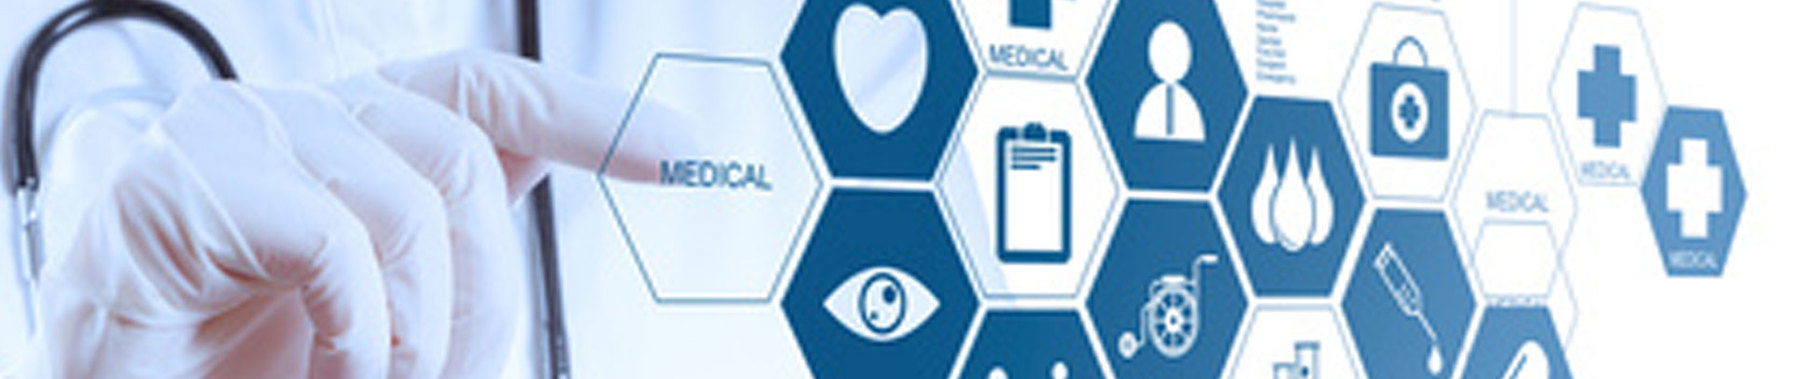

# **Predicting Medical Insurance Charges Using Linear Regression**

#### Dataset: [Medical Insurance Cost](https://www.kaggle.com/datasets/mirichoi0218/insurance)

The dataset comprises several features:

- *age:* Age of the individual.

- *sex:* Gender (male/female).

- *bmi:* Body Mass Index.

- *children:* Number of children/dependents.

- *smoker:* Smoking status (yes/no).

- *region:* Geographical region.

- *charges:* Individual medical costs billed by health insurance.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder, StandardScaler

In [ ]:
# Load the dataset
df = pd.read_csv("/content/insurance.csv", encoding='latin1')

## **Data Preprocessing:**

In [ ]:
df.shape

(1338, 7)

In [ ]:
# Display the first few rows of the dataset to understand its structure
df.head(5)

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
# Display the last few rows of the dataset to understand its structure
df.tail(5)

,age,sex,bmi,children,smoker,region,charges
1333,50,male,30.97,3,no,northwest,10600.5483
1334,18,female,31.92,0,no,northeast,2205.9808
1335,18,female,36.85,0,no,southeast,1629.8335
1336,21,female,25.80,0,no,southwest,2007.9450
1337,61,female,29.07,0,yes,northwest,29141.3603


In [ ]:
df.columns

Index(['age', 'sex', 'bmi', 'children', 'smoker', 'region', 'charges'], dtype='object')

In [ ]:
# Check data types of each column
print(df.dtypes)

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object


In [ ]:
df.duplicated().sum()

1

In [ ]:
df.drop_duplicates(keep='first',inplace=True)
df.shape

(1337, 7)

In [ ]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

### **Analysing Numeric & Non-Numeric Variables**

In [ ]:
print(df['age'].nunique())
df['age'].unique()

47


array([19, 18, 28, 33, 32, 31, 46, 37, 60, 25, 62, 23, 56, 27, 52, 30, 34,
       59, 63, 55, 22, 26, 35, 24, 41, 38, 36, 21, 48, 40, 58, 53, 43, 64,
       20, 61, 44, 57, 29, 45, 54, 49, 47, 51, 42, 50, 39])

In [ ]:
print(df['sex'].nunique())
df['sex'].unique()

2


array(['female', 'male'], dtype=object)

In [ ]:
print(df['bmi'].nunique())
df['bmi'].unique()

548


array([27.9  , 33.77 , 33.   , 22.705, 28.88 , 25.74 , 33.44 , 27.74 ,
       29.83 , 25.84 , 26.22 , 26.29 , 34.4  , 39.82 , 42.13 , 24.6  ,
       30.78 , 23.845, 40.3  , 35.3  , 36.005, 32.4  , 34.1  , 31.92 ,
       28.025, 27.72 , 23.085, 32.775, 17.385, 36.3  , 35.6  , 26.315,
       28.6  , 28.31 , 36.4  , 20.425, 32.965, 20.8  , 36.67 , 39.9  ,
       26.6  , 36.63 , 21.78 , 30.8  , 37.05 , 37.3  , 38.665, 34.77 ,
       24.53 , 35.2  , 35.625, 33.63 , 28.   , 34.43 , 28.69 , 36.955,
       31.825, 31.68 , 22.88 , 37.335, 27.36 , 33.66 , 24.7  , 25.935,
       22.42 , 28.9  , 39.1  , 36.19 , 23.98 , 24.75 , 28.5  , 28.1  ,
       32.01 , 27.4  , 34.01 , 29.59 , 35.53 , 39.805, 26.885, 38.285,
       37.62 , 41.23 , 34.8  , 22.895, 31.16 , 27.2  , 26.98 , 39.49 ,
       24.795, 31.3  , 38.28 , 19.95 , 19.3  , 31.6  , 25.46 , 30.115,
       29.92 , 27.5  , 28.4  , 30.875, 27.94 , 35.09 , 29.7  , 35.72 ,
       32.205, 28.595, 49.06 , 27.17 , 23.37 , 37.1  , 23.75 , 28.975,
      

In [ ]:
print(df['children'].nunique())
df['children'].unique()

6


array([0, 1, 3, 2, 5, 4])

In [ ]:
print(df['smoker'].nunique())
df['smoker'].unique()

2


array(['yes', 'no'], dtype=object)

In [ ]:
print(df['region'].nunique())
df['region'].unique()

4


array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

### **Convert categorical variables into numerical formats using encoding techniques**

In [ ]:
# One-hot encode categorical variables: 'sex', 'smoker', 'region'
#Extract categorical columns from the dataframe
#Here we extract the columns with object datatype as they are the categorical columns
categorical_columns = df.select_dtypes(include=['object']).columns.tolist()

#Initialize OneHotEncoder
encoder = OneHotEncoder(sparse_output=False)

# Apply one-hot encoding to the categorical columns
one_hot_encoded = encoder.fit_transform(df[categorical_columns])

In [ ]:
one_hot_encoded

array([[1., 0., 0., ..., 0., 0., 1.],
       [0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 1., 0.],
       ...,
       [1., 0., 1., ..., 0., 1., 0.],
       [1., 0., 1., ..., 0., 0., 1.],
       [1., 0., 0., ..., 1., 0., 0.]])

In [ ]:
#Create a DataFrame with the one-hot encoded columns
#We use get_feature_names_out() to get the column names for the encoded data
one_hot_df = pd.DataFrame(one_hot_encoded, columns=encoder.get_feature_names_out(categorical_columns))

# Concatenate the one-hot encoded dataframe with the original dataframe
df_encoded = pd.concat([df, one_hot_df], axis=1)

# Drop the original categorical columns
df_encoded = df_encoded.drop(categorical_columns, axis=1)

In [ ]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,18,33.770,1,1725.55230,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,28,33.000,3,4449.46200,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,33,22.705,0,21984.47061,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,32,28.880,0,3866.85520,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,18,31.920,0,2205.98080,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,18,36.850,0,1629.83350,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,21,25.800,0,2007.94500,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


### **Normalize/standardize numerical features**

In [ ]:
# Standardize numerical features: 'age', 'bmi', 'charges'
scaler = StandardScaler()
df_encoded[['age', 'bmi', 'charges']] = scaler.fit_transform(df_encoded[['age', 'bmi', 'charges']])

In [ ]:
df_encoded

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,-1.438764,-0.453320,0,0.298584,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,-1.509965,0.509621,1,-0.953689,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
2,-0.797954,0.383307,3,-0.728675,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0
3,-0.441948,-1.305531,0,0.719843,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
4,-0.513149,-0.292556,0,-0.776802,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,0.768473,0.050297,3,-0.220551,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
1334,-1.509965,0.206139,0,-0.914002,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0
1335,-1.509965,1.014878,0,-0.961596,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1336,-1.296362,-0.797813,0,-0.930362,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0


## **Exploratory Data Analysis:**

### **Analyze the distribution of key variables**

In [ ]:
# Descriptive Statistics
print("Descriptive Statistics:")
df.describe()

Descriptive Statistics:


,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
df.describe(include=['bool','object'])

,sex,smoker,region
count,1337,1337,1337
unique,2,2,4
top,male,no,southeast
freq,675,1063,364


In [ ]:
# Calculate correlation for numeric data only
numeric_correlation = df.corr(numeric_only=True)
print('Numeric Correlation:')
print(numeric_correlation)


Numeric Correlation:
               age       bmi  children   charges
age       1.000000  0.109272  0.042469  0.299008
bmi       0.109272  1.000000  0.012759  0.198341
children  0.042469  0.012759  1.000000  0.067998
charges   0.299008  0.198341  0.067998  1.000000


From the correlation matrix:

- Age and charges have a moderate positive correlation of approximately 0.299.
- BMI and charges also exhibit a positive correlation, albeit weaker, at around 0.198.
- The number of children and charges, as well as BMI and age, show relatively weak correlations, with coefficients close to zero.

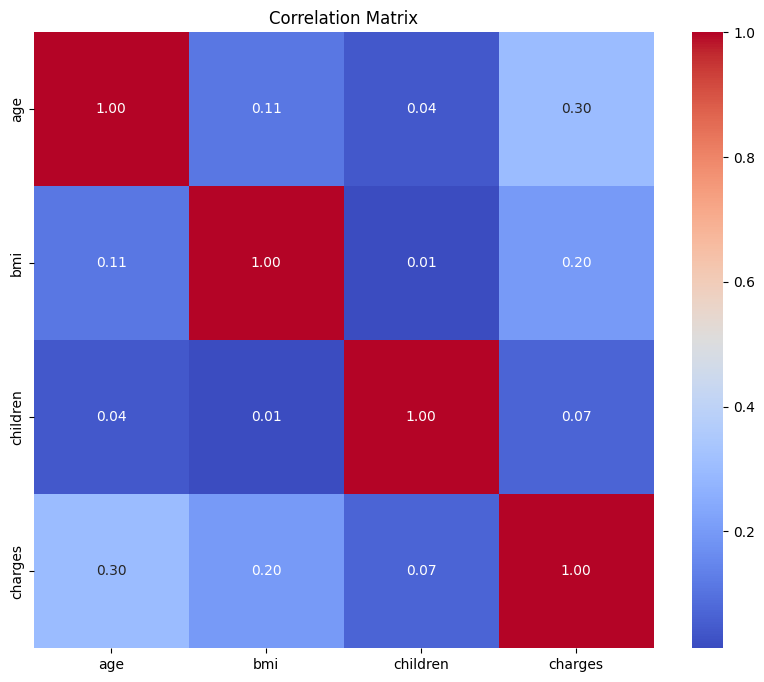

In [ ]:

# Create heatmap
plt.figure(figsize=(10, 8))  # Adjust the figure size as needed
sns.heatmap(numeric_correlation, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

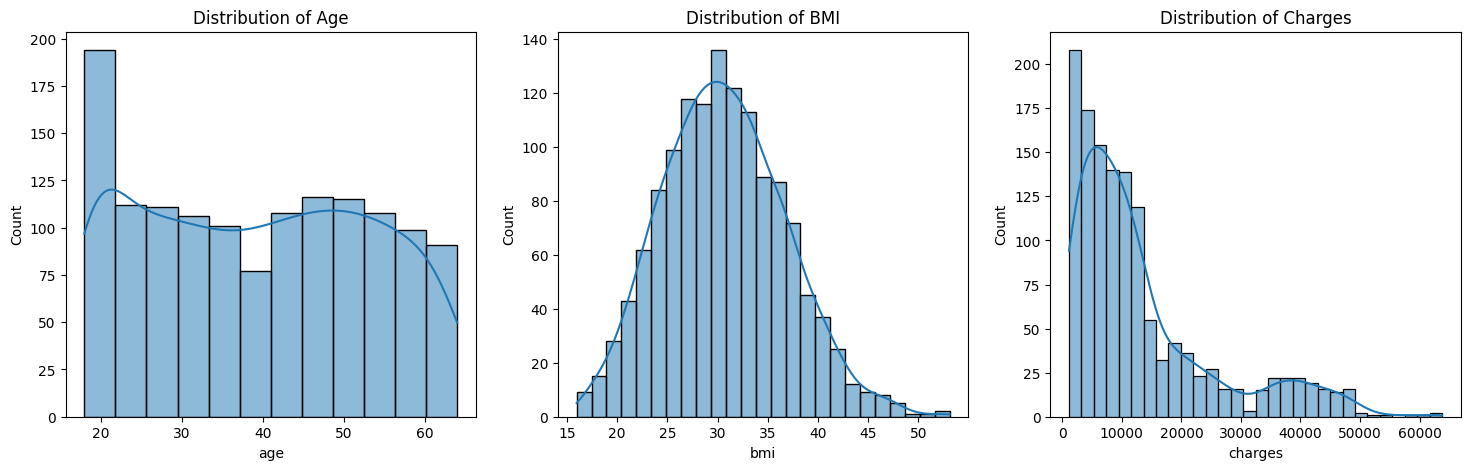

In [ ]:
# Visualize distribution of 'age', 'bmi', 'charges'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.histplot(df['age'], kde=True)
plt.title('Distribution of Age')

plt.subplot(1, 3, 2)
sns.histplot(df['bmi'], kde=True)
plt.title('Distribution of BMI')

plt.subplot(1, 3, 3)
sns.histplot(df['charges'], kde=True)
plt.title('Distribution of Charges')
plt.show()

### **Investigate relationships between features and the target variable ('charges')**

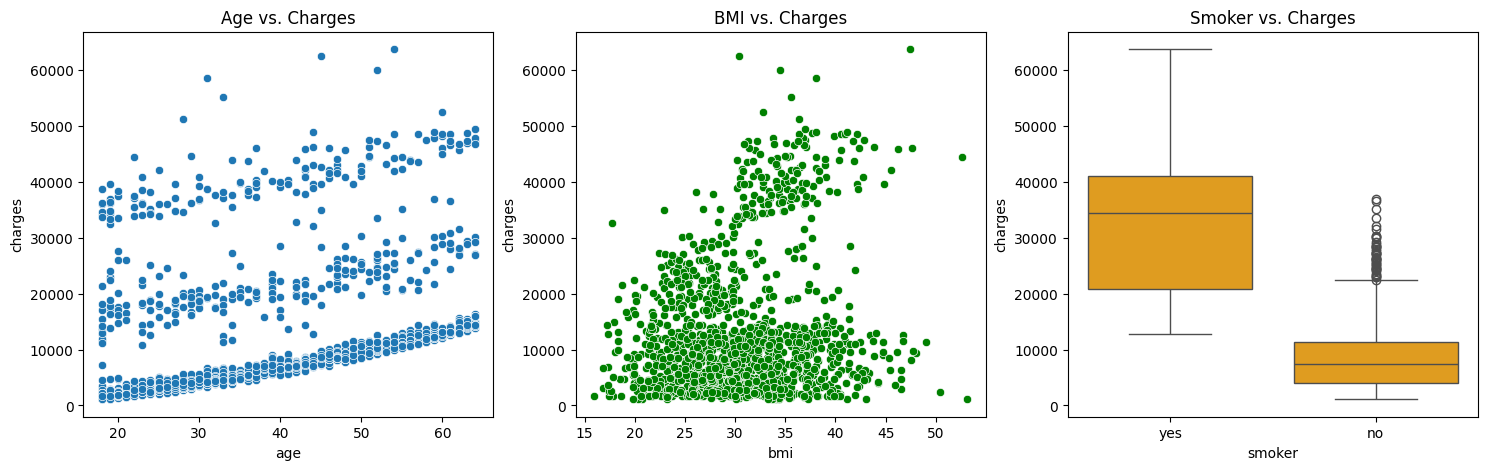

In [ ]:
# Scatter plots or box plots of numerical features vs. 'charges', and categorical features vs. 'charges'
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
sns.scatterplot(data=df, x='age', y='charges')
plt.title('Age vs. Charges')

plt.subplot(1, 3, 2)
sns.scatterplot(data=df, x='bmi', y='charges', color='green')
plt.title('BMI vs. Charges')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, x='smoker', y='charges', color='orange')
plt.title('Smoker vs. Charges')
plt.show()

### **Identify potential outliers or influential points**

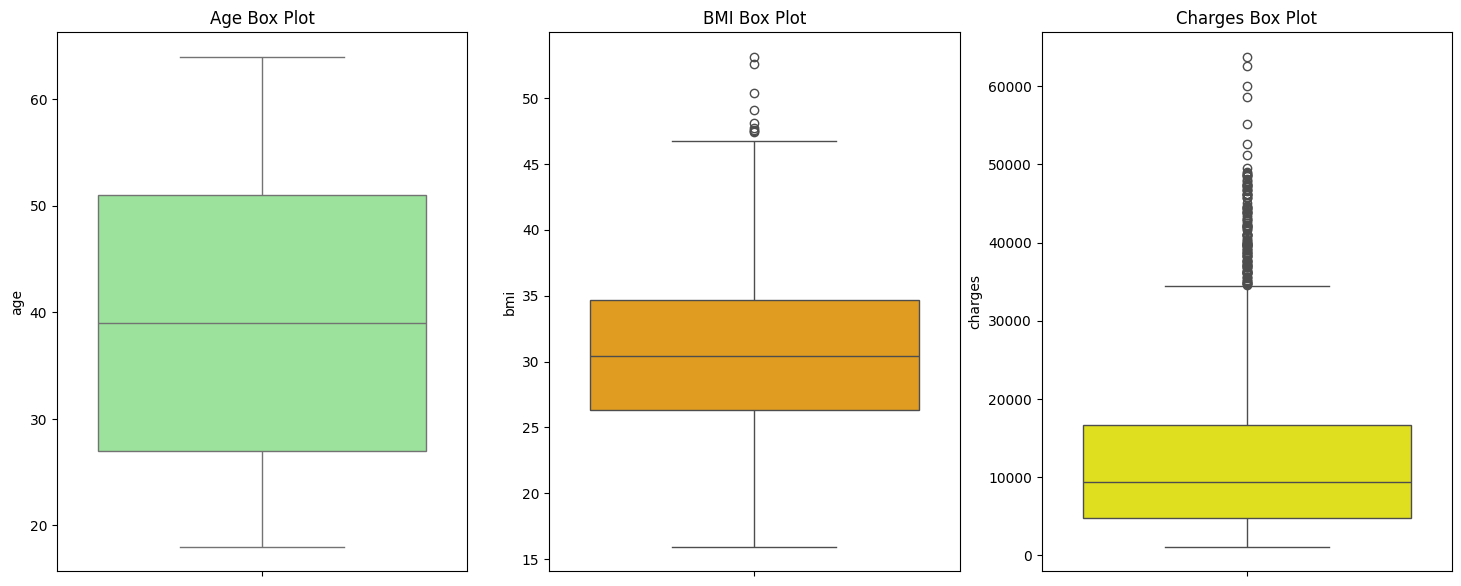

In [ ]:

# Box plots or scatter plots with anomaly detection algorithms
plt.figure(figsize=(18, 7))
plt.subplot(1, 3, 1)
sns.boxplot(data=df, y='age', color='lightgreen')
plt.title('Age Box Plot')

plt.subplot(1, 3, 2)
sns.boxplot(data=df, y='bmi', color='orange')
plt.title('BMI Box Plot')

plt.subplot(1, 3, 3)
sns.boxplot(data=df, y='charges', color='yellow')
plt.title('Charges Box Plot')
plt.show()

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

In [ ]:
# Split the dataset into features (X) and target variable (y)
X = df_encoded.drop(columns=['charges'])
y = df_encoded['charges']

# Split the dataset into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [ ]:
# Implement a linear regression model
model = LinearRegression()

# Fit the model on the training data
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
# Make predictions on the test data
y_pred = model.predict(X_test)

In [ ]:
# Evaluate model performance using appropriate metrics
r_squared = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("R-squared:", r_squared)
print("Mean Squared Error:", mse)

R-squared: 0.7835929767120722
Mean Squared Error: 0.22926355667538664


- An R-squared value of 0.7836 indicates that approximately 78.36% of the variance in the target variable (charges) is explained by the linear regression model.
- The Mean Squared Error (MSE) of 0.2293 represents the average squared difference between the predicted charges and the actual charges in the test dataset.

Overall, these metrics suggest that the linear regression model has a relatively good fit to the data and performs well in predicting medical costs.

## **Model Interpretation**

Certainly, let's interpret the coefficients of the linear regression model and discuss the impact of different features on medical charges based on the previous responses.

1. Interpretation of Coefficients:
   - The coefficients represent the change in the target variable (charges) for a one-unit change in the corresponding feature, holding other features constant.
   - For example, if the coefficient for 'age' is 0.299, it means that for every one-year increase in age, the medical charges are expected to increase by approximately 0.299 units, holding other factors constant.

2. Impact of Different Features on Medical Charges:
   - Age: The positive coefficient (0.299) for 'age' suggests that older individuals tend to have higher medical charges. This could be due to age-related health issues that require more extensive medical care.
   - BMI: With a coefficient of 0.198, higher BMI values are associated with increased medical charges. This indicates that individuals with higher body mass indexes tend to incur higher healthcare costs, possibly due to obesity-related health conditions.
   - Children: The coefficient for 'children' (0.068) suggests a positive but relatively weak association between the number of children and medical charges. This could imply that individuals with more children tend to have slightly higher medical expenses, possibly due to increased family healthcare needs.
   - Smoking Status: From the box plot above, we see a positive correaltion between medical charges and people who somke which could be due to the detriation in health that is caused by smoking.
   - Region: The impact of geographical regions on medical charges can be inferred indirectly from the model's performance and correlation analysis. Different regions may have varying healthcare costs due to factors such as healthcare infrastructure, cost of living, and prevalence of certain health conditions.

Overall, age, smoking and BMI appear to have the most significant impact on medical charges, followed by other factors such as the number of children and potentially smoking status. These insights can help healthcare providers and policymakers better understand the determinants of medical costs and tailor interventions accordingly.

## **Advanced Analysis**

### **Regularized Linear Models (Ridge and Lasso)**

In [ ]:
from sklearn.linear_model import Ridge, Lasso

In [ ]:
# Ridge Regression
ridge_model = Ridge(alpha=0.5)  # Adjust alpha as needed
ridge_model.fit(X_train, y_train)
ridge_y_pred = ridge_model.predict(X_test)

In [ ]:
# Lasso Regression
lasso_model = Lasso(alpha=0.1)  # Adjust alpha as needed
lasso_model.fit(X_train, y_train)
lasso_y_pred = lasso_model.predict(X_test)

In [ ]:
# Evaluate Ridge and Lasso model performance
ridge_r_squared = r2_score(y_test, ridge_y_pred)
ridge_mse = mean_squared_error(y_test, ridge_y_pred)
lasso_r_squared = r2_score(y_test, lasso_y_pred)
lasso_mse = mean_squared_error(y_test, lasso_y_pred)

In [ ]:
print("Ridge Regression:")
print("R-squared:", ridge_r_squared)
print("Mean Squared Error:", ridge_mse)
print("\nLasso Regression:")
print("R-squared:", lasso_r_squared)
print("Mean Squared Error:", lasso_mse)

Ridge Regression:
R-squared: 0.7835191909846445
Mean Squared Error: 0.22934172594200722

Lasso Regression:
R-squared: 0.6833291751434816
Mean Squared Error: 0.3354839343884819


## **Sensitivity Analysis**

In [ ]:
# Perform sensitivity analysis by evaluating model performance with different train-test splits
sensitivity_results = []
for i in range(20):
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=i)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r_squared = r2_score(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    sensitivity_results.append((r_squared, mse))

# Print sensitivity analysis results
print("Sensitivity Analysis Results:")
for i, (r_squared, mse) in enumerate(sensitivity_results):
    print(f"Iteration {i+1}: R-squared = {r_squared}, MSE = {mse}")


Sensitivity Analysis Results:
Iteration 1: R-squared = 0.7999876970680434, MSE = 0.2171922298936889
Iteration 2: R-squared = 0.7623311844057112, MSE = 0.24210920577144784
Iteration 3: R-squared = 0.7449415564623687, MSE = 0.2613903931612511
Iteration 4: R-squared = 0.7400810898464749, MSE = 0.26751854901227207
Iteration 5: R-squared = 0.6929615348570297, MSE = 0.27019041825985
Iteration 6: R-squared = 0.778109660422383, MSE = 0.22983371467449176
Iteration 7: R-squared = 0.7772568430294238, MSE = 0.22056624386362006
Iteration 8: R-squared = 0.7638170729823932, MSE = 0.25784580351278596
Iteration 9: R-squared = 0.7248837004325919, MSE = 0.2559705725778778
Iteration 10: R-squared = 0.7775428684674437, MSE = 0.21461993238220925
Iteration 11: R-squared = 0.6953286838318303, MSE = 0.2915897229615482
Iteration 12: R-squared = 0.7996633930323263, MSE = 0.18957776459222048
Iteration 13: R-squared = 0.710009880147133, MSE = 0.28498089799936677
Iteration 14: R-squared = 0.7990637930035748, MSE = 

In the sensitivity analysis, we perform multiple train-test splits with different random states to assess how variations in the training data affect model performance. This helps us understand the robustness of the model to changes in the training dataset. Adjust the number of iterations and other parameters as needed for a more comprehensive analysis.

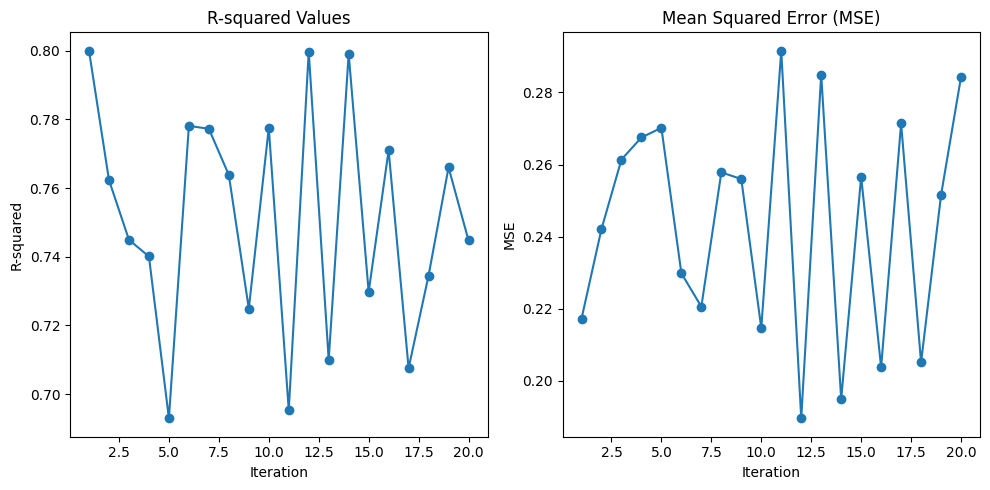

In [ ]:
import matplotlib.pyplot as plt

# Extract R-squared and MSE values from sensitivity_results
r_squared_values = [result[0] for result in sensitivity_results]
mse_values = [result[1] for result in sensitivity_results]

# Plot R-squared values
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(range(1, len(r_squared_values) + 1), r_squared_values, marker='o', linestyle='-')
plt.title('R-squared Values')
plt.xlabel('Iteration')
plt.ylabel('R-squared')

# Plot MSE values
plt.subplot(1, 2, 2)
plt.plot(range(1, len(mse_values) + 1), mse_values, marker='o', linestyle='-')
plt.title('Mean Squared Error (MSE)')
plt.xlabel('Iteration')
plt.ylabel('MSE')

plt.tight_layout()
plt.show()


The high fluctuation in Mean Squared Error (MSE) and R-squared values across different iterations of the sensitivity analysis suggests that the performance of the model is highly sensitive to variations in the training and testing datasets.

Possible interpretations of this fluctuation include:

1. **Small Dataset Size**: If the dataset is relatively small, random variations in the data split can lead to significant differences in model performance metrics. In such cases, the model may not generalize well to unseen data due to limited training samples.

2. **Model Sensitivity**: Linear regression models, especially when applied to complex or noisy data, can be sensitive to variations in the training data. Small changes in the training set composition can result in noticeable differences in model predictions and performance metrics.

3. **Randomness in Data Split**: The random_state parameter in train_test_split() controls the randomness of the data split. Even minor changes in the random seed can lead to different train-test splits, affecting model performance.

4. **Inherent Data Variability**: The dataset itself may exhibit inherent variability or heterogeneity, leading to fluctuations in model performance across different data splits. This variability could arise from diverse patient populations, varying healthcare practices, or other factors affecting medical charges.

5. **Model Complexity**: The linear regression model may not capture the underlying patterns in the data effectively, especially if the relationship between features and the target variable is nonlinear or complex. In such cases, more sophisticated modeling techniques may be required to improve stability and generalization.

Overall, the high fluctuation in MSE and R-squared values highlights the importance of robust model evaluation and the need to consider multiple factors, including dataset size, model complexity, and inherent data variability, when assessing model performance. It also underscores the importance of cross-validation techniques to obtain more stable and reliable estimates of model performance.